# Transformer

## Transformer : High-level view
* Attention is all you need, NeurIPS'17
  * 이전에는 LSTM 또는 GRU 기반의 Seq2Seq 모델에 추가적은 add-one module로 attention module이 사용되었음
  * Atteniont 만을 사용하여 RNN을 대체하여 sequence를 input으로 받고 예측함

### RNN : Long-term dependency
* sequence 데이터를 매 timestep마다 encoding을 하는 과정

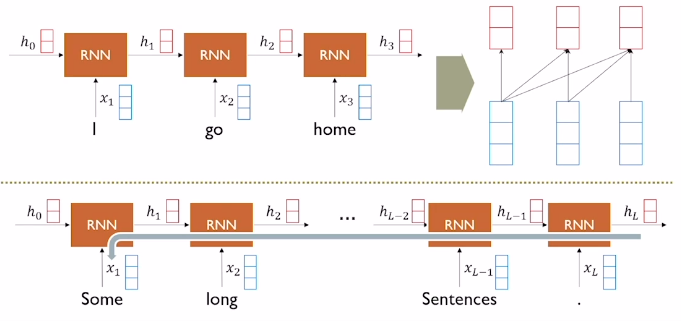

  * 3번째 timestep에서 1번째 timestep의 정보가 변질 또는 소실될 수 있음

### Bi-Directional RNNs
* 기존 RNN은 왼쪽에서 오른쪽으로 흘러가기 때문에 기준 단어 encoder에 오른쪽 단어를 참조한 기준 단어의 정보를 담을 수 없음
  * 왼쪽에서 오른쪽으로 주어진 sequence를 encoding하는 특성 때문
* 오른쪽에서 왼쪽으로 진행하는 RNN을 구성하는 경우, forward RNN의 parameter와는 별개로 독립적으로 parameter를 가지는 또다른 RNN을 구성함
  * forward RNN : 정보가 왼쪽에서 오른쪽으로 진행함
  * backward RNN : 정보가 오른쪽에서 왼쪽으로 진행함
* forward RNN과 backward RNN을 병렬적으로 만듬
  * 특정 단어에 대해 forward RNN에서 앞의 정보를 가지는 hidden-state vector와 backward RNN에서 뒤의 정보를 가지는 hidden-state vector 두 개를 가져와서 concat함으로서 양쪽의 정보를 모두 포함하는 encoding vector를 생성
    * encoding vector : hidden-state dimension의 2배

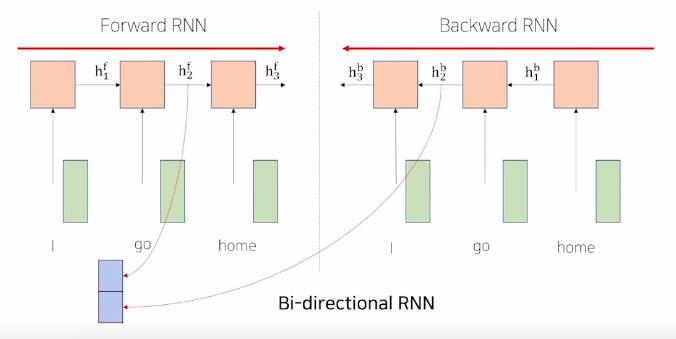


## Transformer: Long-Term Dependency
* Transformer 구조와 동작방식
  * input, output의 setting은 RNN과 동일하게 유지됨
    * input : word에 대한 input vector
    * output : word에 대해 잘 반영한 encoding vector
  * attention이 적용되는 방식은 seq2seq with attention에서 사용되는 방식과 거의 동일함
* self-attention module
  * long-term dependency의 문제를 기본적으로 해결한 sequence encoding 기법
  * $x$를 decoder 의 hidden-state vector라고 하면, encoder hidden-state vector들의 세트는 $x_1$, $x_2$, $x_3$
  * $x_1$이 $x_1$, $x_2$, $x_3$와 각각 내적으로 유사도를 구함
  * 이 유사도를 softmax로 취해서 얻어진 가중치를 걸어서 input vector와 선형결합 또는 가중평균을 기준 단어에 대한 encoding vector라고 함
  * decoder hidden-state vector와 encoder hidden-state vector(decoder hidden-state vector를 통해서 유사도를 구함)간에 구별없이 동일한 set의 vector들 내에서 적용 가능
  * 자기 자신과의 유사도가 다른 값으로 내적했을 때 보다 큰 값으로 도출됨 -> 자기 자신에 큰 가중치가 걸리는 형태로 attention vector의 양상이 나타나며, 결과 vector들은 자기자신의 정보들을 주로 포함하는 vector로 나오는 문제가 발생함 

* 문제 해결을 위해 기본 attention 구조를 확장함
  * query : 주어진 vector들 중에 어느 vector를 선별적으로 가져올지에 대한 기준이 되는 vector
  * key : query vector와 내적이 되는 각각의 재료 vector
  * value : 각 key와 유사도를 구한 후 softmax를 취한 가중치를 적용하여 가중평균/선형결합을 구할 때 사용되는 재료 vector
  * key, value가 1대1로 매칭되기 때문에 개수가 동일함

  * 동일한 word vector가 query, key, value 역할을 모두 함
    * 역할에 따른 linear transformation matrix가 각각 따로 정의되어 있음
      * 각 역할에 따른 linear transformation matrix를 사용하여 각각의 vector를 구하여 사용함
    * 서로 다른 변환이 존재하기 때문에 자기 자신과의 내적값이 다른 key와의 내적값 보다 작을 수 있음
    * 같은 vector 내에서 3가지 역할이 모두 공유되는 것이 아닌 서로 다른 형태로 변환될 수 있는 확장된 형태가 만들어짐
  * 각각의 word에 대한 encoding vector를 만들 때 모든 word의 정보를 고려함
    * sequence 길이가 길어도 self-attention module을 적용해서 각 word의 encoding vector를 만들면, timestep의 gap이 크더라도 동일한 key, value vector로 변환되고, query와의 내적에 의한 유사도만 높다면 멀리 있는 정보도 손쉽게 가져올 수 있음

    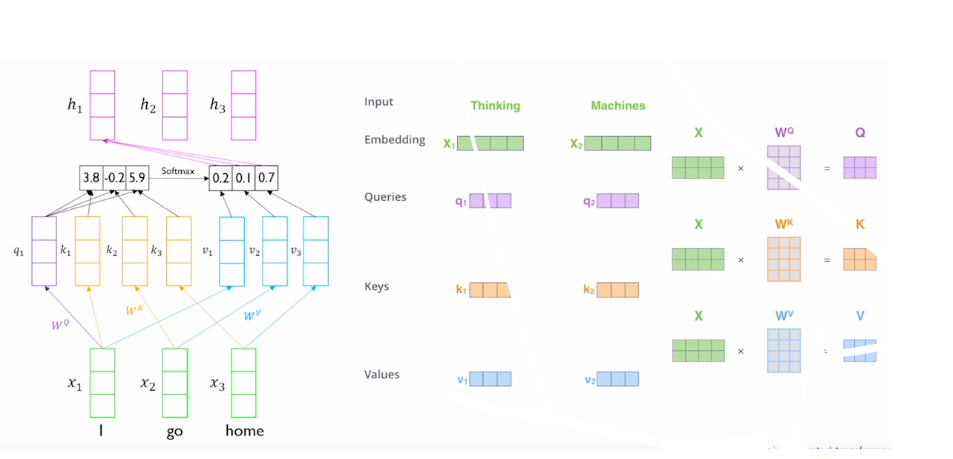


## Transformer: Scaled Dot-Product Attention(attention 수식)
* input : $q$(query), $(k, v)$ (a set of key-value pairs. key, value pair들의 집합)
* output : weighted sum of values(value vector에 대한 가중 평균)
  * weight of each value(value vector에서 쓰이는 가중치) : computed by an inner product of query and corresponding key(query vector와 value vector에 해당하는 key vector와의 내적값에 의해 구해짐)
* $d_k$ : dimensionality of querie, dimensionality of key
  * query와 key는 내적을 해야하기 때문에 같은 dimension을 가짐
* $d_v$ : dimensionality of value
  * query나 key와 dimensiont이 같지 않아도 됨
  * 계산된 value vector에 가중치를 상수배 하여 가중평균을 내기 때문
  * 단, value의 개수는 key와 동일함
$$A(q, K, V) = \sum_{i}{{{exp(q \cdot k_{i})} \over {\sum_{j}{exp(q \cdot k_{j})}}}v_{i}}$$
  * query의 encoding vector(=Value vector에 대한 가중평균)를 구하는 수식
  * input과 output 간의 관계를 나타냄
  * 행렬을 대문자로 나타냄
  * encoding vector의 차원 : $d_v$

* input과 output간의 관계를 확장
  * 여러 query vector에 대한 attention model의 계산을 행렬 연산으로 바꿈
    * GPU(병렬적인 행렬 연산)를 활용하여 빠르게 계산함 
  * input에서 query vector를 하나의 vector에서 다수의 query로 확장
$$A(Q, K, V) = \mathrm{softmax}{(QK^{T})}V$$
  * $Q$ : $\left\vert Q \right\vert \times d_k$
    * $\left\vert Q \right\vert$ : query의 개수(row의 개수)
    * $d_k$ : 각각의 query가 가지는 vector의 dimension(column의 개수)
  * $K^{T}$ : $d_k \times \left\vert K \right\vert$
    * $K$가 transpose(대각선으로 대칭된 형태)된 형태
      * $Q$와 내적을 하기 위함
    * $d_k$ : 각각의 key가 가지는 vector의 dimension(row의 개수)
    * $\left\vert K \right\vert$ : key의 개수(column의 개수)
  * value vector와의 연산을 하기 전에 softmax를 적용함
  * $V$ : $\left\vert V \right\vert \times d_v$
    * $\left\vert V \right\vert$ : value의 개수(row의 개수)
      * softmax를 적용한 matrix의 column의 개수와 동일함
    * $d_v$ : 각각의 value가 가지는 vector의 dimension(column의 개수)
  * output의 각 row는 input의 각 row(query vector)에 대한 output(vector)

  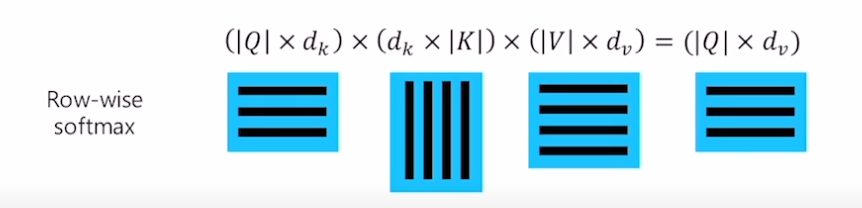
    




* example. encoding
  * Thinking Machines
  * $X$ : input, word에 대한 vector
    * row : 하나의 word에 대한 vector
  * $Q$ : query
    * row : 각 word에 대한 query vector
  * $K$ : key
    * row : 각 word에 대한 key vector
  * $V$ : value
    * row : 각 word에 대한 value vector

  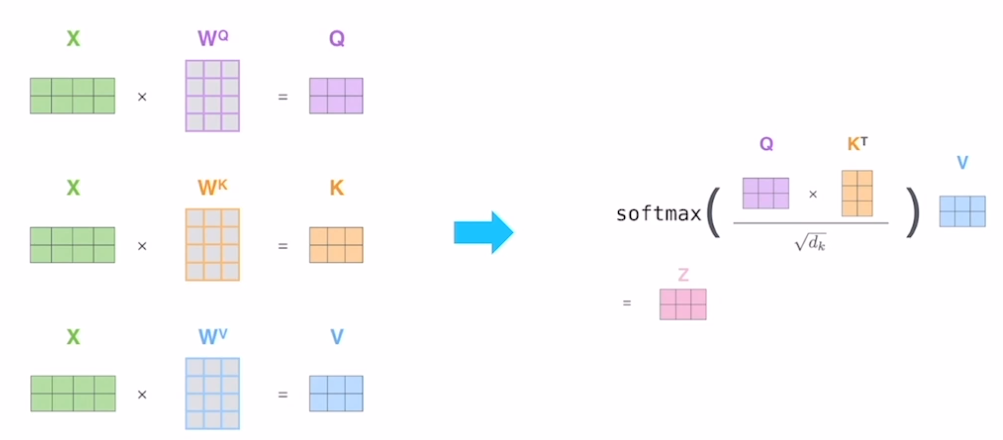

* Problem
  * 내적에 사용되는 query와 key vector의 dimension에 따라 내적값의 분산이 크게 좌지우지될 수 있고, $\mathrm{softmax}$로부터 나오는 확률분포의 패턴이 영항을 받음(특정키(높은값을 가진 키)에 몰리는 분포를 가지거나 전체적으로 고른 분포를 가짐)
  * 특정값에 몰리는 경우 gradient vanishing이 발생할 위험이 있음
    * 분산을 크게 잡고 scaling이 되지 않은 attention을 사용할 때 학습이 되지 않음
  * ex. $q = [a, b], k_i = [[x], [y]], q \cdot k_{i} = ax + by$
    * 각 원소의 값(a, b, x, y)가 평균과 분산을 가지는 형태의 확률변수로 가정하는 경우
    * 평균 : 0, 분산 : 1이라 하면
      * $ax$의 평균 : 0, 분산 : 1, $by$의 평균 : 0, 분산 : 1
      * $ax + by$의 평균 : 0, 분산 : 2
    * $q$와 $k_i$의 차원이 증가한다면 그에따라 분산도 증가함
      * 차원이 100(원소가 100개)이라면 분산도 100
    * 1개의 query vector에 대해 key vector가 3개로 주어어진 경우, 유사도를 표준편차로 생각해볼 수 있음.
      * dimension : 10 => 표준편차 $\sqrt{d_k} = 10$(분산 : 100) => 내적값에 기반한 유사도 분포 예시 : [8, -11, 7]
      * dimension : 1 => 표준편차 $\sqrt{d_k} = \sqrt{2} \simeq 1.4$(분산 : 2) => 내적값에 기반한 유사도 분포 예시 : [1.1, 0.8, -1.7]
    * 유사도 분포를 softmax로 주게되면 표준편차/분산이 클수록 $\mathrm{softmax}$의 확률분포가 큰 값에 몰리는 패턴이 발생하고, 표준편차/분산이 작을수록 확률분포가 고르게(예시에서 key가 3개이므로 각 key에 대한 확률분포가 30~50%사이 값을 가짐) 나타남
* Solution
  * $\sqrt{d_k}$를 나누어 분산을 일정하게 유지시켜서 학습을 안정화함
    * 분산이 1인 형태로 일정하게 유지됨
  $$A(Q, K, V) = \mathrm{softmax}{({{QK^{T}} \over \sqrt{d_k}})}V$$
* $\mathrm{softmax}$의 output을 적절히 조절하는 것이 학습에 도움이 됨

    
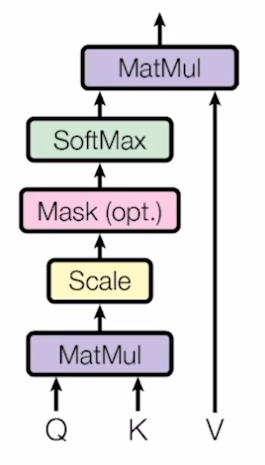